## Q4.

In [1]:
import numpy as np

train=[]
test=[]

#import data
with open('hw3_train.dat.txt') as file:
    for i in file.readlines():
        train.append([1]+list(map(float,i.strip().split(' '))))

with open('hw3_test.dat.txt') as file:
    for i in file.readlines():
        test.append([1]+list(map(float,i.strip().split(' '))))
        
train=np.array(train)
test=np.array(test)

#data dimension
m=train.shape[1]-1
#data count
n=train.shape[0]

In [2]:
#gradient Ein
def f(y,w,x):
    temp=y*w.dot(x)
    return (-y*x)/(np.exp(temp)+1)

In [13]:
w=np.zeros(m)
k=0.01
Ein_gd=[]

for i in range(2000):
    ###Gradient Descent###
    s=np.zeros(m)
    for j in range(n):
        s+=f(train[j][-1],w,train[j][:-1])
    s=s/n
    w-=k*s
    
    #calculate Ein_gd
    result=np.sign(train[:,:-1].dot(w))
    Ein_gd.append((result!=train[:,-1]).sum()/train.shape[0])

In [14]:
w=np.zeros(m)
k=0.001
Ein_sgd=[]
j=0

for i in range(2000):
    ###Stochastic Gradient Descent###
    if j==n-1:
        j=0
    s=f(train[j][-1],w,train[j][:-1])
    w-=k*s 
    
    #calculate Ein_sgd
    result=np.sign(train[:,:-1].dot(w))
    Ein_sgd.append((result!=train[:,-1]).sum()/train.shape[0])
    
    #update j after each iteration
    j+=1

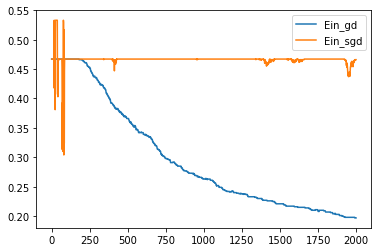

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(2000)
plt.plot(x,Ein_gd,label='Ein_gd')
plt.plot(x,Ein_sgd,label='Ein_sgd')
plt.legend()
plt.show()

## Q5.

In [10]:
w=np.zeros(m)
k=0.01
Eout_gd=[]

for i in range(2000):
    ###Gradient Descent###
    s=np.zeros(m)
    for j in range(n):
        s+=f(train[j][-1],w,train[j][:-1])
    s=s/n
    w-=k*s
    
    #calculate Eout_gd
    result=np.sign(test[:,:-1].dot(w))
    Eout_gd.append((result!=test[:,-1]).sum()/test.shape[0])

In [19]:
w=np.zeros(m)
k=0.001
Eout_sgd=[]
j=0

for i in range(2000):
    ###Stochastic Gradient Descent###
    if j==n-1:
        j=0
    s=f(train[j][-1],w,train[j][:-1])
    w-=k*s 
    
    #calculate Ein_sgd
    result=np.sign(test[:,:-1].dot(w))
    Eout_sgd.append((result!=test[:,-1]).sum()/test.shape[0])
    
    #update j after each iteration
    j+=1
    
#计算Xw
r1=test[:,:-1].dot(w)
#计算sign(Xw)
r2=np.sign(r1)
#求出误差
print((r2!=test[:,-1]).sum()/test.shape[0])

0.47533333333333333


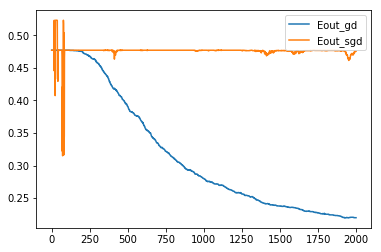

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(2000)
x1=np.arange(20000)
plt.plot(x,Eout_gd,label='Eout_gd')
plt.plot(x,Eout_sgd,label='Eout_sgd')
plt.legend()
plt.show()